In [1]:
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

In [3]:
DATASET_TRAIN_PATH = 'C:/Users/Gagik Vardanyan/Desktop/Jupyter/DataScience Course work/real-estate-price-prediction-moscow/train.csv'
TEST_DATASET_PATH = 'C:/Users/Gagik Vardanyan/Desktop/Jupyter/DataScience Course work/real-estate-price-prediction-moscow/test.csv'

### Посмотрим на датасет

In [4]:
df = pd.read_csv(DATASET_TRAIN_PATH, sep=",")
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [6]:
df = reduce_mem_usage(df)
df.dtypes

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

### Выбросим "ID" чтобы алгоритм не учился на # объекта

In [8]:
pd.options.display.max_columns = 100

In [9]:
df.drop(columns = ['Id'], axis = 1, inplace = True)
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.453125
9996,27,2.0,64.307686,37.038422,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.156250
9997,178,1.0,29.648056,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.906250
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.406250


### Начнем обработку датасета с пропусков

In [10]:
df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [11]:
df['LifeSquare_nan'] = 0
df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
0,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000,1
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0
3,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000,1
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.453125,0
9996,27,2.0,64.307686,37.038422,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.156250,0
9997,178,1.0,29.648056,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.906250,0
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.406250,0


##### Попробуем обработать пропуски LifeSquare не по средней, а через средний коэффициент соотношения жилой площади к нежилой

In [12]:
SqL = df.loc[df['LifeSquare'].notnull()]
SqL['SqLRatio'] = SqL['Square'] / SqL['LifeSquare']
SqL['SqLRatio'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1       1.719200
2       1.643360
4       1.667035
5       1.327460
6       1.558759
          ...   
9995    1.475409
9996    1.736243
9997    1.790843
9998    1.448044
9999    1.605977
Name: SqLRatio, Length: 7887, dtype: float32>

In [13]:
df['LifeSquare'] = df['LifeSquare'].fillna(df['Square']/1.7192)


##### Проверим, что пропуски отсутствуют

In [14]:
df.isna().sum()

DistrictId           0
Rooms                0
Square               0
LifeSquare           0
KitchenSquare        0
Floor                0
HouseFloor           0
HouseYear            0
Ecology_1            0
Ecology_2            0
Ecology_3            0
Social_1             0
Social_2             0
Social_3             0
Healthcare_1      4798
Helthcare_2          0
Shops_1              0
Shops_2              0
Price                0
LifeSquare_nan       0
dtype: int64

##### C Healthcare_1 сложнее, так как непонятно, что из себя представляет эта величина. Попробуем через медиану

In [15]:
df['Healthcare_1'].median()

900.0

In [16]:
df['Healthcare_1_nan'] = 0
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000,1,1
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0
3,1,1.0,40.409908,23.505066,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000,1,1
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750,0,1


In [17]:
df['Healthcare_1'] = df['Healthcare_1'].fillna(900)
df.head(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0
3,1,1.0,40.409908,23.505066,1.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1


### Обработаем выбросы

#### Посмотрим на данные

In [18]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan,Healthcare_1_nan
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315720,36.756962,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358887,1.319500,4.231300,214138.937500,0.211300,0.479800
std,43.587592,0.839522,21.058716,76.836563,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.644226,1.493601,4.806341,92872.273438,0.408251,0.499617
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344,0.000000,0.000000
25%,20.000000,1.000000,41.774879,23.668048,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.628906,0.000000,0.000000
50%,36.000000,2.000000,52.513309,32.962791,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438,0.000000,0.000000
75%,75.000000,2.000000,65.900627,44.482814,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.460938,0.000000,1.000000
max,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500,1.000000,1.000000


In [19]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan,Healthcare_1_nan
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,11,3097,0,900.0,0,0,305018.875000,1,1
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.546875,0,0
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.718750,0,0
3,1,1.0,40.409908,23.505066,1.0,10,22.0,1977,0.007122,1,264,0,900.0,0,1,168106.000000,1,1
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,33,8667,2,900.0,0,6,343995.093750,0,1


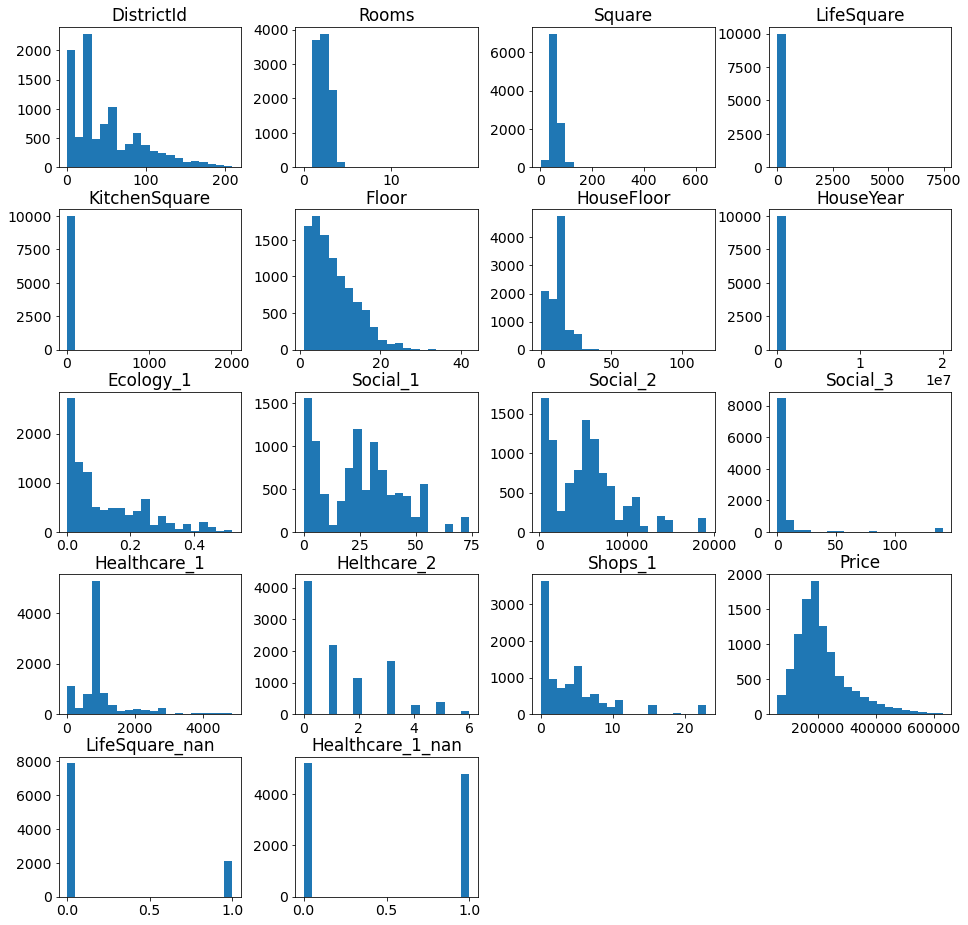

In [20]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

#### Посмотрим на параметр Rooms

In [21]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [22]:
df.loc[df['Rooms'].isin([0, 10, 19]), 'Rooms'] = df['Rooms'].median()

#### Посмотрим на параметр Square, LifeSquare

In [23]:
Square_min_treshold, Square_max_treshhold = df['Square'].quantile([0.01, 0.99])
Square_min_treshold, Square_max_treshhold

(29.71979543685913, 117.85611785888672)

In [24]:
LifeSquare_min_treshold, LifeSquare_max_treshhold = df['LifeSquare'].quantile([0.01, 0.99])
LifeSquare_min_treshold, LifeSquare_max_treshhold

(3.43567351102829, 91.62301986694337)

In [25]:
df = df[(df['Square'] < df['Square'].quantile(.99)) & (df['Square'] > df['Square'].quantile(.01))]
df = df[(df['LifeSquare'] < df['LifeSquare'].quantile(.99)) & (df['LifeSquare'] > df['LifeSquare'].quantile(.01))]

#### Параметр KitchenSquare не будем отбрасывать, заменим неправдоподобно низкие значения на выбранное

In [26]:
df['KitchenSquare'].sort_values().unique()

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.200e+01, 2.500e+01, 2.700e+01,
       2.900e+01, 3.200e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.900e+01,
       4.000e+01, 4.100e+01, 4.300e+01, 4.800e+01, 5.100e+01, 5.300e+01,
       5.400e+01, 5.800e+01, 6.000e+01, 6.200e+01, 6.300e+01, 6.600e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.800e+01, 8.400e+01, 1.970e+03,
       2.014e+03], dtype=float32)

In [27]:
df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [28]:
df.loc[df['KitchenSquare'] > 84, 'KitchenSquare'] = 84

#### Параметр Floor, House Floor обработаем

In [29]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

In [30]:
df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  40.,  44.,  45.,  48.,  99., 117.],
      dtype=float32)

In [31]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

In [32]:
false_floor = df.loc[df['Floor'] > df['HouseFloor']].index

In [33]:
df.loc[false_floor, 'Floor'] = df.loc[false_floor, 'HouseFloor'].apply(lambda x: x)

#### Параметр HouseYear

In [34]:
df['HouseYear'].sort_values(ascending = False).unique()

array([20052011,     4968,     2020,     2019,     2018,     2017,
           2016,     2015,     2014,     2013,     2012,     2011,
           2010,     2009,     2008,     2007,     2006,     2005,
           2004,     2003,     2002,     2001,     2000,     1999,
           1998,     1997,     1996,     1995,     1994,     1993,
           1992,     1991,     1990,     1989,     1988,     1987,
           1986,     1985,     1984,     1983,     1982,     1981,
           1980,     1979,     1978,     1977,     1976,     1975,
           1974,     1973,     1972,     1971,     1970,     1969,
           1968,     1967,     1966,     1965,     1964,     1963,
           1962,     1961,     1960,     1959,     1958,     1957,
           1956,     1955,     1954,     1953,     1952,     1951,
           1950,     1948,     1947,     1942,     1941,     1940,
           1939,     1938,     1937,     1936,     1935,     1934,
           1933,     1932,     1931,     1930,     1929,     1

In [35]:
df.loc[df['HouseYear'] > 2022, 'HouseYear'] = 2020

### Получим новые параметры

#### Переведем тип object в Dummies

In [36]:
pd.get_dummies(df['Ecology_2'])
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df = df.rename(columns = {'A' : 'Ecology_2_A', 'B' : 'Ecology_2_B'})
pd.get_dummies(df['Ecology_3'])
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df = df.rename(columns = {'A' : 'Ecology_3_A', 'B' : 'Ecology_3_B'})
pd.get_dummies(df['Shops_2'])
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df = df.rename(columns = {'A' : 'Shops_2_A', 'B' : 'Shops_2_B'})
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,1,0,1,0,1
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,1,0,1,0,1
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,1,0,1,0,1
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,1,0,1,0,1
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,1,0,1,0,1


#### Внесем новые показатели: 

In [37]:
def house_age_cat(X):

    X['house_age_cat'] = 0

    X.loc[X['HouseYear'] <= 1980, 'house_age_cat'] = 1  
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'house_age_cat'] = 2
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'house_age_cat'] = 3
    X.loc[X['HouseYear'] > 2010, 'house_age_cat'] = 4

    return X

In [38]:
df = house_age_cat(df)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,1,0,1,0,1,4
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,1,0,1,0,1,1
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,1,0,1,0,1,2
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,1,0,1,0,1,1
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,1,0,1,0,1,1


In [39]:
df['Floor_ratio'] = df['Floor'] / df['HouseFloor']
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,1,0,1,0,1,4,0.400000
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,1,0,1,0,1,1,0.875000
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,1,0,1,0,1,2,0.117647
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,1,0,1,0,1,1,0.454545
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,1,0,1,0,1,1,1.000000


In [40]:
median_price_dist = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedianPriceDistrict'})

df = df.merge(median_price_dist, on=['DistrictId', 'Rooms'], how='left')

In [41]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio,MedianPriceDistrict
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,1,0,1,0,1,4,0.400000,207858.578125
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,1,0,1,0,1,1,0.875000,149344.968750
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,1,0,1,0,1,2,0.117647,241772.375000
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,1,0,1,0,1,1,0.454545,146271.156250
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,1,0,1,0,1,1,1.000000,203194.640625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,9,1.0,43.303459,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,5648,1,30.0,2,4,B,136744.343750,0,0,0,1,0,1,0,1,2,0.857143,137445.328125
9600,61,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,900.0,1,9,B,119367.453125,0,1,0,1,0,1,0,1,2,0.250000,232514.843750
9601,27,2.0,64.307686,37.038422,9.0,13,14.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,199715.156250,0,1,0,1,0,1,1,0,1,0.928571,166268.953125
9602,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.406250,0,0,0,1,0,1,0,1,1,0.333333,154956.812500


In [42]:
median_price_dist = df.groupby(['DistrictId', 'Rooms', 'Floor'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'FloorMedianPriceDistrict'})
df = df.merge(median_price_dist, on=['DistrictId', 'Rooms', 'Floor'], how='left')

In [43]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio,MedianPriceDistrict,FloorMedianPriceDistrict
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,1,0,1,0,1,4,0.400000,207858.578125,178333.453125
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,1,0,1,0,1,1,0.875000,149344.968750,152544.156250
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,1,0,1,0,1,2,0.117647,241772.375000,215087.781250
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,1,0,1,0,1,1,0.454545,146271.156250,161059.562500
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,1,0,1,0,1,1,1.000000,203194.640625,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,9,1.0,43.303459,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,5648,1,30.0,2,4,B,136744.343750,0,0,0,1,0,1,0,1,2,0.857143,137445.328125,138880.562500
9600,61,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,900.0,1,9,B,119367.453125,0,1,0,1,0,1,0,1,2,0.250000,232514.843750,205942.968750
9601,27,2.0,64.307686,37.038422,9.0,13,14.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,199715.156250,0,1,0,1,0,1,1,0,1,0.928571,166268.953125,176878.906250
9602,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.406250,0,0,0,1,0,1,0,1,1,0.333333,154956.812500,158410.750000


##### Еще раз посмотрим на наши признаки после обработки данных

In [44]:
df_num_features = df[df.columns.drop(['Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'LifeSquare_nan', 'Healthcare_1_nan', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'])]
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Price,house_age_cat,Floor_ratio,MedianPriceDistrict,FloorMedianPriceDistrict
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,305018.875000,4,0.400000,207858.578125,178333.453125
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,177734.546875,1,0.875000,149344.968750,152544.156250
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,282078.718750,2,0.117647,241772.375000,215087.781250
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,168106.000000,1,0.454545,146271.156250,161059.562500
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,343995.093750,1,1.000000,203194.640625,343995.093750


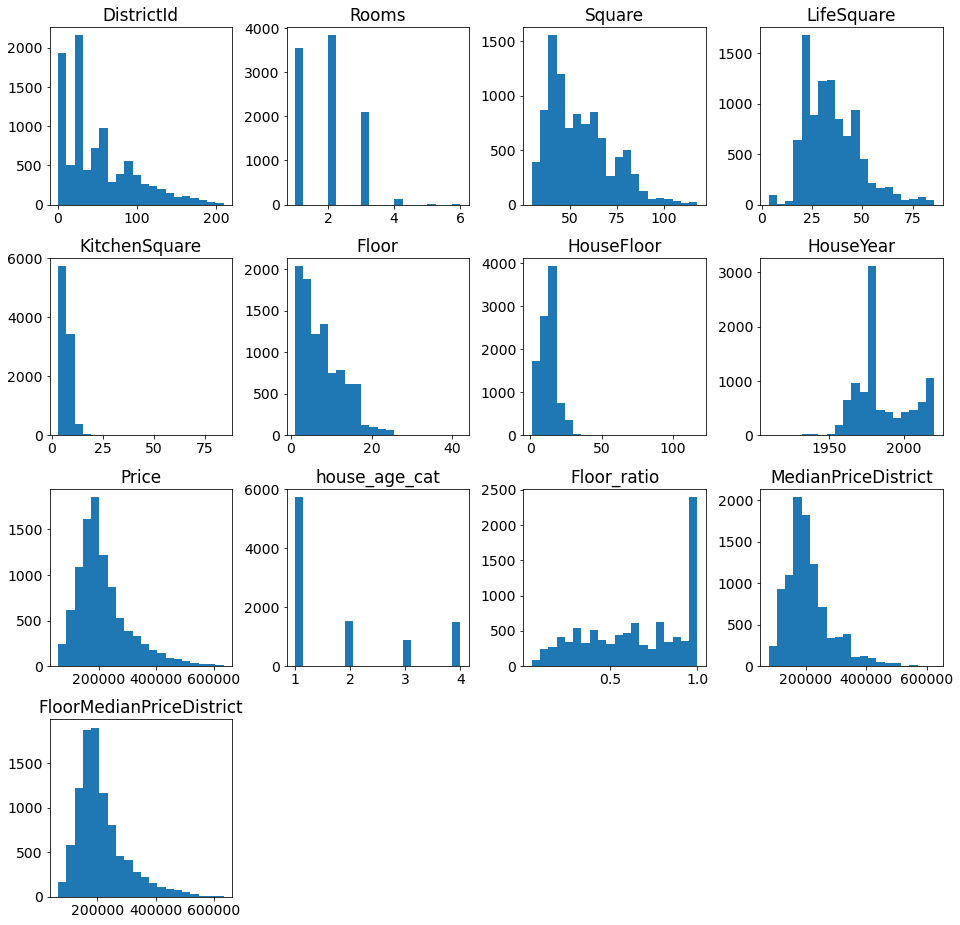

In [45]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

#### Посмотрим на корреляционную матрицу, чтобы оценить можно ли не брать некоторые признаки

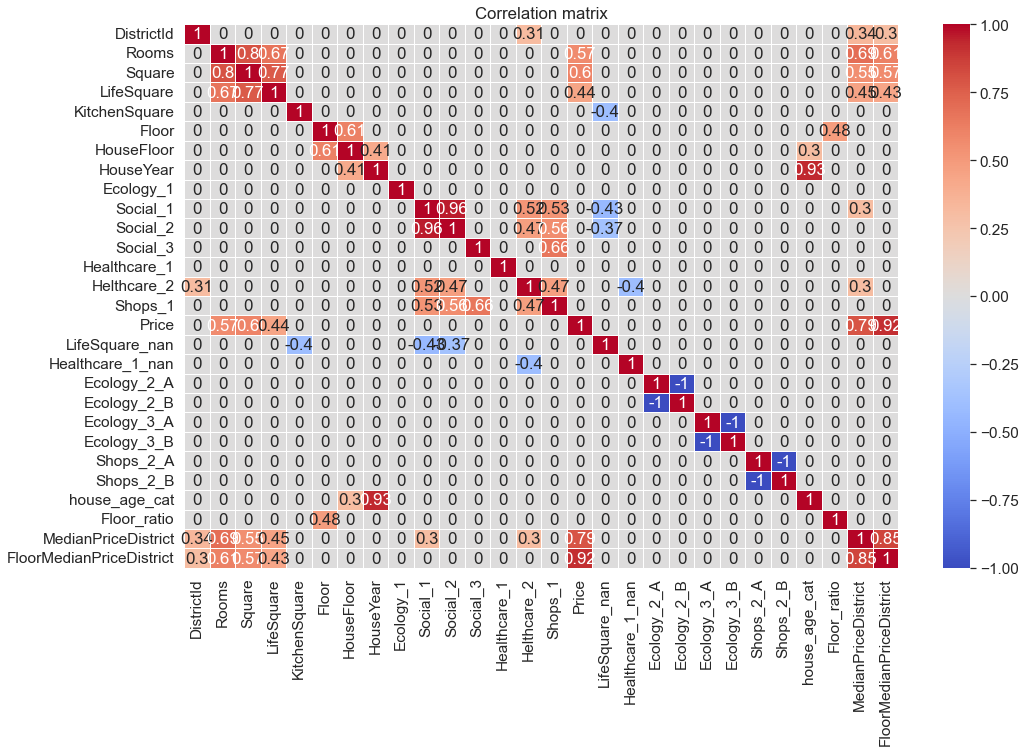

In [46]:
plt.figure(figsize=(16, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

#### Отберем признаки

In [47]:
train_df = df
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio,MedianPriceDistrict,FloorMedianPriceDistrict
0,27,3.0,115.027313,66.907463,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,1,0,1,0,1,4,0.400000,207858.578125,178333.453125
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,1,0,1,0,1,1,0.875000,149344.968750,152544.156250
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,1,0,1,0,1,2,0.117647,241772.375000,215087.781250
3,1,1.0,40.409908,23.505066,3.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,1,0,1,0,1,1,0.454545,146271.156250,161059.562500
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,1,0,1,0,1,1,1.000000,203194.640625,343995.093750


In [48]:
feature_name = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Social_1', 'Social_2',
                'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_A', 'Shops_2_B', 'house_age_cat', 
                'Floor_ratio', 'MedianPriceDistrict', 'FloorMedianPriceDistrict']
target_name = ['Price']

In [49]:
X = train_df[feature_name]
y = train_df[target_name]

In [50]:
X.shape

(9604, 25)

In [51]:
y.shape

(9604, 1)

In [52]:
train_df = pd.read_csv(DATASET_TRAIN_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [53]:
train_df.shape

(10000, 20)

#### Загрузка дополнительных модулей

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

#### Разбивка на Train & Test

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [56]:
X_train.shape

(6722, 25)

In [57]:
X_valid.shape

(2882, 25)

##### Функция для оценки метрик модели

In [58]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(train_true_values, train_pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(train_true_values, train_pred_values), 3)))
    print("********************************")
    print("R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(test_true_values, test_pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(test_true_values, test_pred_values), 3)))

##### Предварительно использовал GridSearchCV, но не стал включать ее в финальную версию ноутбука

In [59]:
rf_model_2 = RandomForestRegressor(max_depth = 8 , max_features = 9, n_estimators = 200, random_state=42)
rf_model_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=9, n_estimators=200,
                      random_state=42)

In [60]:
y_train_preds = rf_model_2.predict(X_train)
y_test_preds = rf_model_2.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

R2:	0.909
RMSE:	27050.172
MSE:	731711822.157
********************************
R2:	0.869
RMSE:	33087.83
MSE:	1094804471.965


##### Выполним кросс-валидацию

In [61]:
cv_score = cross_val_score(rf_model_2, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.85527416, 0.86655801, 0.86014654])

In [62]:
cv_score.mean()

0.860659568208078

##### Определим Важность признаков

In [63]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model_2.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
24,FloorMedianPriceDistrict,0.536265
23,MedianPriceDistrict,0.223695
2,Square,0.081749
1,Rooms,0.030131
3,LifeSquare,0.026058
14,Social_2,0.021195
13,Social_1,0.017155
4,KitchenSquare,0.013072
15,Social_3,0.010452
7,HouseYear,0.007921


### Прогнозирование на тестовом датасете

In [64]:
test_df.shape

(5000, 19)

In [65]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [66]:
test_df = reduce_mem_usage(test_df)
test_df.dtypes

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int16
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
dtype: object

In [67]:
test_df.drop(columns = ['Id'], axis = 1, inplace = True)

In [68]:
test_df['LifeSquare_nan'] = 0
test_df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1
test_df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,0
2,27,2.0,59.463676,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,0
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B,0
4,74,1.0,53.837055,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B,0
4996,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B,0
4997,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B,0
4998,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B,0


In [69]:
SqL = test_df.loc[test_df['LifeSquare'].notnull()]
SqL['SqLRatio'] = SqL['Square'] / SqL['LifeSquare']
SqL['SqLRatio'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       1.929783
1       0.998256
3       1.464751
5       1.638573
6       2.027562
          ...   
4995    1.423125
4996    0.991289
4997    1.771103
4998    1.841852
4999    1.977435
Name: SqLRatio, Length: 3959, dtype: float32>

In [70]:
test_df['LifeSquare'] = test_df['LifeSquare'].fillna(test_df['Square']/1.929783)

In [71]:
test_df['Healthcare_1'].median()

900.0

In [72]:
test_df['Healthcare_1_nan'] = 0
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0,0
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,0,1
2,27,2.0,59.463676,30.813660,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,0,1
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B,0,1
4,74,1.0,53.837055,27.897984,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0,0


In [73]:
test_df['Healthcare_1'] = test_df['Healthcare_1'].fillna(900)

In [74]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [75]:
test_df.loc[test_df['Rooms'].isin([0, 17]), 'Rooms'] = df['Rooms'].median()

In [76]:
Square_min_treshold, Square_max_treshhold = test_df['Square'].quantile([0.01, 0.99])
Square_min_treshold, Square_max_treshhold

(30.061233234405517, 115.56324913024925)

In [77]:
LifeSquare_min_treshold, LifeSquare_max_treshhold = test_df['LifeSquare'].quantile([0.01, 0.99])
LifeSquare_min_treshold, LifeSquare_max_treshhold

(2.9675571274757386, 86.90640235900885)

In [79]:
test_df['KitchenSquare'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,
        24.,  30.,  33.,  34.,  40.,  41.,  42.,  44.,  57.,  60.,  61.,
        62.,  65.,  97., 112., 620.], dtype=float32)

In [80]:
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
test_df.loc[test_df['KitchenSquare'] > 97, 'KitchenSquare'] = 97

In [81]:
test_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 46,
       78], dtype=int8)

In [82]:
test_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.], dtype=float32)

In [83]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()
false_floor = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index
test_df.loc[false_floor, 'Floor'] = test_df.loc[false_floor, 'HouseFloor'].apply(lambda x: x)

In [84]:
test_df['HouseYear'].sort_values(ascending = False).unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955,
       1954, 1953, 1952, 1950, 1949, 1948, 1943, 1941, 1940, 1939, 1938,
       1937, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926,
       1920, 1918, 1917, 1914, 1912, 1911, 1910, 1909, 1908], dtype=int16)

In [85]:
pd.get_dummies(test_df['Ecology_2'])
test_df = pd.concat([test_df, pd.get_dummies(test_df['Ecology_2'])], axis=1)
test_df = test_df.rename(columns = {'A' : 'Ecology_2_A', 'B' : 'Ecology_2_B'})
pd.get_dummies(test_df['Ecology_3'])
test_df = pd.concat([test_df, pd.get_dummies(test_df['Ecology_3'])], axis=1)
test_df = test_df.rename(columns = {'A' : 'Ecology_3_A', 'B' : 'Ecology_3_B'})
pd.get_dummies(test_df['Shops_2'])
test_df = pd.concat([test_df, pd.get_dummies(test_df['Shops_2'])], axis=1)
test_df = test_df.rename(columns = {'A' : 'Shops_2_A', 'B' : 'Shops_2_B'})
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0,0,0,1,0,1,0,1
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,0,1,0,1,1,0
2,27,2.0,59.463676,30.813660,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,0,1,0,1,0,1,0,1
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,900.0,0,0,B,0,1,0,1,0,1,0,1
4,74,1.0,53.837055,27.897984,3.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0,0,0,1,0,1,0,1


In [86]:
test_df = house_age_cat(test_df)

In [87]:
test_df['Floor_ratio'] = test_df['Floor'] / test_df['HouseFloor']

In [88]:
test_df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0,0,0,1,0,1,0,1,1,0.555556
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,0,1,0,1,1,0,4,0.411765
2,27,2.0,59.463676,30.813660,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,0,1,0,1,0,1,0,1,1,1.000000
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,900.0,0,0,B,0,1,0,1,0,1,0,1,1,1.000000
4,74,1.0,53.837055,27.897984,3.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0,0,0,1,0,1,0,1,1,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,5,5.0,1962,0.069660,B,B,31,6119,4,900.0,1,2,B,0,1,0,1,0,1,0,1,1,1.000000
4996,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B,0,0,0,1,0,1,0,1,4,0.777778
4997,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B,0,0,0,1,0,1,0,1,1,0.400000
4998,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,900.0,0,11,B,0,1,0,1,0,1,0,1,1,0.571429


In [89]:
median_price_dist = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedianPriceDistrict'})

In [90]:
median_price_dist

,DistrictId,Rooms,MedianPriceDistrict
0,0,1.0,151223.500000
1,0,2.0,176210.812500
2,0,3.0,300610.375000
3,1,1.0,146271.156250
4,1,2.0,202352.609375
...,...,...,...
640,202,3.0,286215.875000
641,205,1.0,220501.562500
642,207,3.0,426186.406250
643,208,2.0,431137.625000


In [91]:
test_df = test_df.merge(median_price_dist, on=['DistrictId', 'Rooms'], how='left')

In [92]:
median_price_dist = df.groupby(['DistrictId', 'Rooms', 'Floor'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'FloorMedianPriceDistrict'})
test_df = test_df.merge(median_price_dist, on=['DistrictId', 'Rooms', 'Floor'], how='left')

In [93]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio,MedianPriceDistrict,FloorMedianPriceDistrict
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0,0,0,1,0,1,0,1,1,0.555556,171834.406250,160455.390625
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,0,1,0,1,1,0,4,0.411765,128851.578125,128808.351562
2,27,2.0,59.463676,30.813660,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,0,1,0,1,0,1,0,1,1,1.000000,166268.953125,NaN
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,900.0,0,0,B,0,1,0,1,0,1,0,1,1,1.000000,159451.718750,153617.546875
4,74,1.0,53.837055,27.897984,3.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0,0,0,1,0,1,0,1,1,0.470588,165107.718750,166683.812500


In [94]:
test_df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,house_age_cat,Floor_ratio,MedianPriceDistrict,FloorMedianPriceDistrict
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0,0,0,1,0,1,0,1,1,0.555556,171834.406250,160455.390625
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,0,1,0,1,1,0,4,0.411765,128851.578125,128808.351562
2,27,2.0,59.463676,30.813660,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,0,1,0,1,0,1,0,1,1,1.000000,166268.953125,NaN
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,900.0,0,0,B,0,1,0,1,0,1,0,1,1,1.000000,159451.718750,153617.546875
4,74,1.0,53.837055,27.897984,3.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0,0,0,1,0,1,0,1,1,0.470588,165107.718750,166683.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,5,5.0,1962,0.069660,B,B,31,6119,4,900.0,1,2,B,0,1,0,1,0,1,0,1,1,1.000000,185083.531250,179651.000000
4996,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B,0,0,0,1,0,1,0,1,4,0.777778,393031.312500,NaN
4997,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B,0,0,0,1,0,1,0,1,1,0.400000,158502.765625,136126.421875
4998,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,900.0,0,11,B,0,1,0,1,0,1,0,1,1,0.571429,167742.765625,167742.765625


In [95]:
test_df.isnull().sum()

DistrictId                     0
Rooms                          0
Square                         0
LifeSquare                     0
KitchenSquare                  0
Floor                          0
HouseFloor                     0
HouseYear                      0
Ecology_1                      0
Ecology_2                      0
Ecology_3                      0
Social_1                       0
Social_2                       0
Social_3                       0
Healthcare_1                   0
Helthcare_2                    0
Shops_1                        0
Shops_2                        0
LifeSquare_nan                 0
Healthcare_1_nan               0
Ecology_2_A                    0
Ecology_2_B                    0
Ecology_3_A                    0
Ecology_3_B                    0
Shops_2_A                      0
Shops_2_B                      0
house_age_cat                  0
Floor_ratio                    0
MedianPriceDistrict           78
FloorMedianPriceDistrict    1223
dtype: int

In [96]:
median_1 = test_df['MedianPriceDistrict'].median()

In [97]:
median_2 = test_df['FloorMedianPriceDistrict'].median()

In [98]:
test_df['MedianPriceDistrict'] = test_df['MedianPriceDistrict'].fillna(median_1)

In [99]:
test_df['FloorMedianPriceDistrict'] = test_df['FloorMedianPriceDistrict'].fillna(median_2)

In [100]:
test_df.isnull().sum()

DistrictId                  0
Rooms                       0
Square                      0
LifeSquare                  0
KitchenSquare               0
Floor                       0
HouseFloor                  0
HouseYear                   0
Ecology_1                   0
Ecology_2                   0
Ecology_3                   0
Social_1                    0
Social_2                    0
Social_3                    0
Healthcare_1                0
Helthcare_2                 0
Shops_1                     0
Shops_2                     0
LifeSquare_nan              0
Healthcare_1_nan            0
Ecology_2_A                 0
Ecology_2_B                 0
Ecology_3_A                 0
Ecology_3_B                 0
Shops_2_A                   0
Shops_2_B                   0
house_age_cat               0
Floor_ratio                 0
MedianPriceDistrict         0
FloorMedianPriceDistrict    0
dtype: int64

#### Выберем признаки для тестовой выборки

In [101]:
feature_name = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Social_1', 'Social_2',
                'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_A', 'Shops_2_B', 'house_age_cat', 
                'Floor_ratio', 'MedianPriceDistrict', 'FloorMedianPriceDistrict']
target_name = ['Price']

In [102]:
X = test_df[feature_name]

#### Сделаем предсказание на основе уже обученной модели

In [103]:
test_predict = rf_model_2.predict(X)

In [104]:
test_predict

array([158510.24524884, 125436.99294735, 167818.74547636, ...,
       143892.93642415, 169454.48366195, 249132.33307895])

In [105]:
submit = pd.read_csv('C:/Users/Gagik Vardanyan/Desktop/Jupyter/DataScience Course work/real-estate-price-prediction-moscow/sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [106]:
submit['Price'] = test_predict
submit.head()

,Id,Price
0,4567,158510.245249
1,5925,125436.992947
2,960,167818.745476
3,3848,148629.643372
4,746,174740.321605


#### Запишем предсказания в файл

In [109]:
submit.to_csv('Vardanyan_Gagik_prediction.csv', index=False)